## Obteniendo Información de los datos

In [1]:
# Importando Librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Obteniendo el dataframe
df = pd.read_csv('Dataset.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,Matrícula,Nombre,Sexo,Casado,Edad,Fumador,Trabajo,Hijos,Colonia,Localidad,CP,Telefono Casa,Telefono Celular,Correo Electronico,IMSS,Tipo de Sangre,Egreso Preparatoria,Preparotoria,Promedio Preparatoria,Certificado de Conducta,Tutor,Codigo Tutor,Situación,Periodo,Creditos,Materias Aprobadas,Materias Cursadas
0,BIO052001,ISVI PAUL,1,No,18,No,Si,0,LÓPEZ MATEOS,MAZATLÁN,82140,Si,Si,Si,Si,A+,2005,5,7.39,REGULAR,JESÚS AARÓN SALAZAR LEYVA,BIO3,4,1,40,9,9
1,BIO052002,MARIA DEL ROSARIO,2,No,,Si,Si,0,LIBERTAD,MAZATLÁN,82010,Si,Si,Si,Si,A+,2005,5,9.19,BUENO,PHILADELPHO PACHECO BOJÓRQUEZ,BIO5,5,14,400,69,69
2,BIO052003,VICTOR JOAQUIN,H,No,18,Si,No,0,FRANCISCO VILLA,MAZATLÁN,82127,Si,Si,Si,Si,O+,2006,6,9.31,BUENO,IDALIA OSUNA RUIZ,BIO2,5,13,400,69,69
3,BIO052005,CINTHYA,2,Si,25,,Si,4,INFONAVIT PLAYAS,MAZATLÁN,82128,Si,No,Si,No,A+,2005,4,7.30,REGULAR,JESÚS AARÓN SALAZAR LEYVA,BIO3,4,0,0,0,0
4,BIO052006,GINESA ELIZET,2,Si,18,No,No,0,LOMA ATRAVESADA,MAZATLÁN,82185,Si,Si,Si,Si,O+,2005,3,9.80,REGULAR,JESÚS AARÓN SALAZAR LEYVA,BIO3,5,10,400,69,69


## Datos Faltantes

In [6]:
# Transformando los datos vacios del dataframe en np.nan
df_NaN = df.replace(r'^\s*$', np.nan, regex=True)

In [7]:
def count_NaN(x):
    i = 0
    for _ in df_NaN[df_NaN.columns[x]].isna():
        if _:
            i+=1

    return i

def porcentaje(column, NaN):
    return round(NaN * 100 / len(df[column]),2) if  NaN != 0 else 0

y = {}


for x in range(len(df.columns)):
    y[df.columns[x]] = count_NaN(x)


#print(porcentaje('Matrícula',5))

for column, nan in y.items():
    if len(column) >= 7 and len(column) < 16:
        print(f'|{column}\t\t|\t{porcentaje(column,nan)} %')
    elif len(column) >= 16 and len(column) <23: 
        print(f'|{column}\t|\t{porcentaje(column,nan)} %')
    elif len(column) >= 23: 
        print(f'|{column}|\t{porcentaje(column,nan)} %')
    elif len(column) < 7:
        print(f'|{column}\t\t\t|\t{porcentaje(column,nan)} %')
    print('-------------------------')




|Matrícula		|	0 %
-------------------------
|Nombre			|	0 %
-------------------------
|Sexo			|	5.35 %
-------------------------
|Casado			|	0 %
-------------------------
|Edad			|	4.54 %
-------------------------
|Fumador		|	2.76 %
-------------------------
|Trabajo		|	0 %
-------------------------
|Hijos			|	0 %
-------------------------
|Colonia		|	0 %
-------------------------
|Localidad		|	0 %
-------------------------
|CP			|	1.94 %
-------------------------
|Telefono Casa		|	0 %
-------------------------
|Telefono Celular	|	0 %
-------------------------
|Correo Electronico	|	0 %
-------------------------
|IMSS			|	0 %
-------------------------
|Tipo de Sangre		|	0.32 %
-------------------------
|Egreso Preparatoria	|	0 %
-------------------------
|Preparotoria		|	0 %
-------------------------
|Promedio Preparatoria	|	0 %
-------------------------
|Certificado de Conducta|	0 %
-------------------------
|Tutor			|	0 %
-------------------------
|Codigo Tutor		|	0 %
----------------

In [6]:
for column, nan in y.items():
    print(column,': ',nan)

Matrícula :  0
Nombre :  0
Sexo :  33
Casado :  0
Edad :  28
Fumador :  17
Trabajo :  0
Hijos :  0
Colonia :  0
Localidad :  0
CP :  12
Telefono Casa :  0
Telefono Celular :  0
Correo Electronico :  0
IMSS :  0
Tipo de Sangre :  2
Egreso Preparatoria :  0
Preparotoria :  0
Promedio Preparatoria :  0
Certificado de Conducta :  0
Tutor :  0
Codigo Tutor :  0
Situación :  0
Periodo :  0
Creditos :  0
Materias Aprobadas :  0
Materias Cursadas :  0


In [8]:
total_faltantes = 33+28+17+12+2
total_datos = 617*27
print(total_faltantes)
print(total_datos)
porcent_total_faltantes = round(total_faltantes * 100 / total_datos,2)
print(porcent_total_faltantes)

92
16659
0.55


## Datos Inconsistentes

In [12]:
df_incon = pd.read_csv('Base de Datos LLena.csv')

In [18]:
df_incon = df_NaN

In [10]:
def is_float(x,df):
    try:
        df[x].astype(float)
        return True
    except:
        return False

In [11]:
for x in df_incon.columns:
    patron = r'^[0-9]+$'
    data_diff = df_incon[df_incon[x].notna() & ~df_incon[x].astype(str).str.match(patron)]
    
    filas_column = df_incon[x].count()
    count_diff = data_diff[x].count()
    porcent = round((count_diff*100/filas_column),2)
    
    if porcent > 0.0 and porcent < 100:
        print('-------------------------------- :: '+x+' :: --------------------------------')
        print('Total de filas en la columna: ',filas_column)
        print('Total de datos NO numericos: ',count_diff)
        print('Porcentaje de datos inconsistentes en esta columna: ',porcent)
        print('\n')

-------------------------------- :: Sexo :: --------------------------------
Total de filas en la columna:  584
Total de datos NO numericos:  63
Porcentaje de datos inconsistentes en esta columna:  10.79




In [ ]:
# Analisis del filtrado estandar
for x in df_incon.describe().columns:
    print('------------------------------------------')
    print(x)
    print('--------------')
    df_incon[x] = df_incon[x].astype(float)
    mean = df_incon[x].mean()
    std = df_incon[x].std()
    n_std = 1
    min = mean - n_std * std
    max = mean + n_std * std
    print('mean:',mean)
    print('std:',std)
    print('min:',min)
    print('max',max)
    
    filtro = df_incon[x].notna() & ~df_incon[x].between(min, max)
    data_diff_std = df_incon[filtro][x]
    #data_diff_std = df_incon[df_incon[x].notna() & ~df_incon[x].between(mean, max)][[x]]
    print('--------------')
    print(data_diff_std.value_counts())
    print(data_diff_std.count())
    print('------------------------------------------')



In [12]:
# Filtrando los datos entre los más estandar 

for x in df_incon.columns:
    if is_float(x,df_incon):
        df_incon[x] = df_incon[x].astype(float)
        mean = df_incon[x].mean()
        std = df_incon[x].std()
        n_std = 1
        min = mean - std
        max = mean + std
        
        filtro = df_incon[x].notna() & ~df_incon[x].between(min, max)
        
        data_diff_std = df_incon[filtro][x]
        print(data_diff_std.value_counts())
        filas_column = df_incon[x].count()
        
        count_diff = data_diff_std.count()
        porcent = round((count_diff*100/filas_column),2)
        
        print('-------------------------------- :: '+x+' :: --------------------------------')
        print('Total de filas en la columna: ',filas_column)
        print('Total de datos fuera de lo estandar: ',count_diff)
        print('Porcentaje de datos fuera de lo estandar en esta columna: ',porcent)
        print('\n')
        filas_column = 0

Edad
24.0    20
25.0    13
23.0     9
21.0     9
22.0     6
26.0     5
27.0     3
28.0     3
29.0     1
Name: count, dtype: int64
-------------------------------- :: Edad :: --------------------------------
Total de filas en la columna:  589
Total de datos fuera de lo estandar:  69
Porcentaje de datos fuera de lo estandar en esta columna:  11.71


Hijos
2.0    20
1.0    19
3.0     4
4.0     3
Name: count, dtype: int64
-------------------------------- :: Hijos :: --------------------------------
Total de filas en la columna:  617
Total de datos fuera de lo estandar:  46
Porcentaje de datos fuera de lo estandar en esta columna:  7.46


CP
81248.0    14
82600.0    10
82800.0     7
82400.0     5
81000.0     4
82871.0     2
82561.0     1
82571.0     1
82999.0     1
82430.0     1
Name: count, dtype: int64
-------------------------------- :: CP :: --------------------------------
Total de filas en la columna:  605
Total de datos fuera de lo estandar:  46
Porcentaje de datos fuera de lo estand

In [15]:
for x in df_incon.columns:
    data_diff = df_incon[x].unique()
    filas_column = df[x].count()
    count_diff = len(data_diff)
    porcent = round((count_diff*100/filas_column),2)
    
    if porcent > 3: 
        print('-------------------------------- :: '+x+' :: --------------------------------')
        print('Total de filas en la columna: ',filas_column)
        print('Total de datos unicos: ',count_diff)
        print('Porcentaje de datos unicos en esta columna: ',porcent)
        print('\n')
        #df_incon= df_incon.drop(columns=x)

-------------------------------- :: Matrícula :: --------------------------------
Total de filas en la columna:  617
Total de datos unicos:  617
Porcentaje de datos unicos en esta columna:  100.0


-------------------------------- :: Nombre :: --------------------------------
Total de filas en la columna:  617
Total de datos unicos:  498
Porcentaje de datos unicos en esta columna:  80.71


-------------------------------- :: Colonia :: --------------------------------
Total de filas en la columna:  617
Total de datos unicos:  102
Porcentaje de datos unicos en esta columna:  16.53


-------------------------------- :: CP :: --------------------------------
Total de filas en la columna:  616
Total de datos unicos:  57
Porcentaje de datos unicos en esta columna:  9.25


-------------------------------- :: Promedio Preparatoria :: --------------------------------
Total de filas en la columna:  617
Total de datos unicos:  249
Porcentaje de datos unicos en esta columna:  40.36


------------

In [14]:
total_inconsistentes = 1410
total_datos = (617 * 25) + 1194
porcent_total_incon = round(total_inconsistentes * 100 / total_datos,2)
porcent_total_incon

8.48

In [19]:
df_incon= df_incon.drop(columns='Matrícula')
df_incon= df_incon.drop(columns='Nombre')
df_incon= df_incon.drop(columns='Colonia')
df_incon= df_incon.drop(columns='CP')
df_incon= df_incon.drop(columns='Tutor')
df_incon= df_incon.drop(columns='Codigo Tutor')

#### Guardando la Base de Datos

In [18]:
df_incon.to_csv('Base de Datos Inconsistentes.csv', index=False)

## Llenado de Datos NaN

In [26]:
df_fill = df_incon

In [27]:
# Verificando si la columna se podría convertir en datos de tipo numerico

def is_float(x,df):
    try:
        df[x].astype(float)
        return True
    except:
        return False
    
#is_integer('Edad')

In [28]:
# Llenando los datos np.nan y reemplazandolos dependiendo del tipo de dato que contenían 

for x in df_fill.columns:
    if df_fill[x].isna().any():
        if is_float(x,df_fill):
            mean = round(df_fill[x].astype(float).mean(),2)
            df_fill[x].fillna(mean,inplace=True)
        else:
            cant_data = df_fill[x].value_counts()
            cant_data.idxmax()
            df_fill[x].fillna(cant_data.idxmax(),inplace=True)

C:\Users\gaels\AppData\Local\Temp\ipykernel_13428\1877017847.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fill[x].fillna(cant_data.idxmax(),inplace=True)
C:\Users\gaels\AppData\Local\Temp\ipykernel_13428\1877017847.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [29]:
# Comprobando si quedan datos nan

df_fill.isna().any()

Sexo                       False
Casado                     False
Edad                       False
Fumador                    False
Trabajo                    False
Hijos                      False
Localidad                  False
Telefono Casa              False
Telefono Celular           False
Correo Electronico         False
IMSS                       False
Tipo de Sangre             False
Egreso Preparatoria        False
Preparotoria               False
Promedio Preparatoria      False
Certificado de Conducta    False
Situación                  False
Periodo                    False
Creditos                   False
Materias Aprobadas         False
Materias Cursadas          False
dtype: bool

In [11]:
df_fill.to_csv('Base de Datos LLena.csv', index=False)

## Transformación de datos

In [30]:
# Copiando el df de los datos llenados con NaN
#df_transform = pd.read_csv('Base de Datos Inconsistentes.csv')
df_transform = df_fill

In [31]:
df_transform.head()

,Sexo,Casado,Edad,Fumador,Trabajo,Hijos,Localidad,Telefono Casa,Telefono Celular,Correo Electronico,IMSS,Tipo de Sangre,Egreso Preparatoria,Preparotoria,Promedio Preparatoria,Certificado de Conducta,Situación,Periodo,Creditos,Materias Aprobadas,Materias Cursadas
0,1,No,18.00,No,Si,0.0,MAZATLÁN,Si,Si,Si,Si,A+,2005.0,5.0,7.39,REGULAR,4.0,1.0,40.0,9.0,9.0
1,2,No,18.91,Si,Si,0.0,MAZATLÁN,Si,Si,Si,Si,A+,2005.0,5.0,9.19,BUENO,5.0,14.0,400.0,69.0,69.0
2,H,No,18.00,Si,No,0.0,MAZATLÁN,Si,Si,Si,Si,O+,2006.0,6.0,9.31,BUENO,5.0,13.0,400.0,69.0,69.0
3,2,Si,25.00,No,Si,4.0,MAZATLÁN,Si,No,Si,No,A+,2005.0,4.0,7.30,REGULAR,4.0,0.0,0.0,0.0,0.0
4,2,Si,18.00,No,No,0.0,MAZATLÁN,Si,Si,Si,Si,O+,2005.0,3.0,9.80,REGULAR,5.0,10.0,400.0,69.0,69.0


#### Elimnando Filas con Datos Inconsistentes

In [32]:
df_transform = df_transform[df_transform['Hijos'] == 0]
df_transform = df_transform[df_transform['Edad'] < 21]
df_transform.reset_index(drop=True, inplace=True)

#### Transformando Variables Binarias

In [33]:
# Transformando la columna de "Sexo"
df_transform['Sexo'].replace('1',0,inplace=True)
df_transform['Sexo'].replace('2',1,inplace=True)
df_transform['Sexo'].replace('H',0,inplace=True)
df_transform['Sexo'].replace('M',1,inplace=True)

# Transformando la columna de "Casado"
df_transform['Casado'].replace('No',0,inplace=True)
df_transform['Casado'].replace('Si',1,inplace=True)

# Transformando la columna de "Fumador"
df_transform['Fumador'].replace('No',0,inplace=True)
df_transform['Fumador'].replace('Si',1,inplace=True)

# Transformando la columna de "Trabajo"
df_transform['Trabajo'].replace('No',0,inplace=True)
df_transform['Trabajo'].replace('Si',1,inplace=True)

# Transformando la columna de "Telefono Casa"
df_transform['Telefono Casa'].replace('No',0,inplace=True)
df_transform['Telefono Casa'].replace('Si',1,inplace=True)

# Transformando la columna de "Telefono Celular"
df_transform['Telefono Celular'].replace('No',0,inplace=True)
df_transform['Telefono Celular'].replace('Si',1,inplace=True)

# Transformando la columna de "Correo Electronico"
df_transform['Correo Electronico'].replace('No',0,inplace=True)
df_transform['Correo Electronico'].replace('Si',1,inplace=True)

# Transformando la columna de "IMSS"
df_transform['IMSS'].replace('No',0,inplace=True)
df_transform['IMSS'].replace('Si',1,inplace=True)

# Tranformando Columna de "Situación"
for x in range(len(df_transform['Situación'])):
    colm = int(df_transform.iloc[x]['Situación'])
    #colm = int(df_transform['Situación'][x])
    if colm <= 4:
        df_transform['Situación'][x] = 0
    elif colm == 5:
        df_transform['Situación'][x] = 1
        




C:\Users\gaels\AppData\Local\Temp\ipykernel_13428\3137052314.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_transform['Sexo'].replace('1',0,inplace=True)
C:\Users\gaels\AppData\Local\Temp\ipykernel_13428\3137052314.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [34]:
df_transform.head()

,Sexo,Casado,Edad,Fumador,Trabajo,Hijos,Localidad,Telefono Casa,Telefono Celular,Correo Electronico,IMSS,Tipo de Sangre,Egreso Preparatoria,Preparotoria,Promedio Preparatoria,Certificado de Conducta,Situación,Periodo,Creditos,Materias Aprobadas,Materias Cursadas
0,0,0,18.00,0,1,0.0,MAZATLÁN,1,1,1,1,A+,2005.0,5.0,7.39,REGULAR,0.0,1.0,40.0,9.0,9.0
1,1,0,18.91,1,1,0.0,MAZATLÁN,1,1,1,1,A+,2005.0,5.0,9.19,BUENO,1.0,14.0,400.0,69.0,69.0
2,0,0,18.00,1,0,0.0,MAZATLÁN,1,1,1,1,O+,2006.0,6.0,9.31,BUENO,1.0,13.0,400.0,69.0,69.0
3,1,1,18.00,0,0,0.0,MAZATLÁN,1,1,1,1,O+,2005.0,3.0,9.80,REGULAR,1.0,10.0,400.0,69.0,69.0
4,0,0,18.00,1,0,0.0,MAZATLÁN,1,1,0,1,A+,2005.0,3.0,8.56,REGULAR,1.0,13.0,400.0,69.0,69.0


#### Transformando Variables Clasificables

In [35]:
# Transformando la columna de "Promedio Preparatoria"
cl = 'Promedio Preparatoria'
df_transform[cl] = df_transform[cl].astype(int)
for x in range(len(df_transform[cl])):
    prom = int(df_transform.iloc[x][cl])
    if prom > 6 and prom < 8:
        df_transform[cl][x] = 0
    elif prom >= 8 and prom < 9:
        
        df_transform[cl][x] = 1
    elif prom >= 9 and prom <= 10:
        
        df_transform[cl][x] = 2


# Transformando la columna de "Certificado de Conducta"
df_transform['Certificado de Conducta'].replace('MALO',0,inplace=True)
df_transform['Certificado de Conducta'].replace('REGULAR',1,inplace=True)
df_transform['Certificado de Conducta'].replace('BUENO',2,inplace=True)

C:\Users\gaels\AppData\Local\Temp\ipykernel_13428\3847821957.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_transform[cl][x] = 0
C:\Users\gaels\AppData\Local\Temp\ipykernel_13428\3847821957.py:7: SettingWithCopyWarning: 
A value is t

#### Transformando Variables Categoricas

In [36]:
# Transformando las variables numericas categoricas

from sklearn.preprocessing import LabelEncoder
labelencorer = LabelEncoder()
df_transform['Localidad'] = labelencorer.fit_transform(df_transform['Localidad'])
df_transform['Tipo de Sangre'] = labelencorer.fit_transform(df_transform['Tipo de Sangre'])

In [37]:
# Transformando las variables categoricas a variables Dummy

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'),['Localidad'])],remainder='passthrough')
ct_2 = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'),['Tipo de Sangre'])],remainder='passthrough')

# Aplicar ColumnTransformer y convertir el resultado a DataFrame de pandas
dummy = pd.DataFrame(ct.fit_transform(df_transform))
dummy_2 = pd.DataFrame(ct_2.fit_transform(df_transform))



#### Concatenando Datos

In [38]:
df_aux = pd.concat([dummy.iloc[:, :9], df_transform], axis=1)
df_aux_2 = pd.concat([dummy_2.iloc[:, :12], df_transform], axis=1)
df_aux = df_aux.iloc[:,:9]
df_aux_2 = df_aux_2.iloc[:,:12]
rename_columns = ['L' + str(x) for x in range(len(df_aux.columns))]
df_aux.columns = rename_columns
rename_columns = ['S' + str(x) for x in range(len(df_aux_2.columns))]
df_aux_2.columns = rename_columns
df_aux_2 = pd.concat([df_aux.iloc[:, :9], df_aux_2], axis=1)
df_transform = pd.concat([df_aux_2.iloc[:, :], df_transform], axis=1)
df_transform.drop(columns=['Localidad','Tipo de Sangre'],inplace=True)

#### Auxiliar de Columnas

In [39]:
aux_columns = df_transform.columns

In [40]:
aux_columns

Index(['L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'S0', 'S1', 'S2',
       'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'Sexo',
       'Casado', 'Edad', 'Fumador', 'Trabajo', 'Hijos', 'Telefono Casa',
       'Telefono Celular', 'Correo Electronico', 'IMSS', 'Egreso Preparatoria',
       'Preparotoria', 'Promedio Preparatoria', 'Certificado de Conducta',
       'Situación', 'Periodo', 'Creditos', 'Materias Aprobadas',
       'Materias Cursadas'],
      dtype='object')

#### Estandarizando Datos

In [41]:
from sklearn.preprocessing import StandardScaler

df_transform = df_transform.apply(pd.to_numeric, errors='coerce')

sc = StandardScaler()

df_transform = sc.fit_transform(df_transform)

#### DF Tansformada

In [42]:
df_transform = pd.DataFrame(df_transform)

In [43]:
df_transform.columns = aux_columns

### Resultado Después del pre-procesamiento de datos

In [44]:
df_transform.head()

,L0,L1,L2,L3,L4,L5,L6,L7,L8,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,Sexo,Casado,Edad,Fumador,Trabajo,Hijos,Telefono Casa,Telefono Celular,Correo Electronico,IMSS,Egreso Preparatoria,Preparotoria,Promedio Preparatoria,Certificado de Conducta,Situación,Periodo,Creditos,Materias Aprobadas,Materias Cursadas
0,-0.125988,-0.044237,-0.062622,-0.099307,-0.088736,-0.088736,-0.133763,0.306622,-0.062622,-0.062622,-0.099307,-0.062622,1.456692,-0.125988,-0.044237,-0.266702,-0.076772,-0.044237,-1.081430,-0.173727,-0.044237,-0.595397,-0.221766,-0.584011,-0.748983,2.273472,0.0,0.196315,0.258199,0.279096,0.321634,-0.030899,1.310664,-1.261012,-0.324401,-1.463251,-2.285651,-2.052499,-2.089378,-2.303701
1,-0.125988,-0.044237,-0.062622,-0.099307,-0.088736,-0.088736,-0.133763,0.306622,-0.062622,-0.062622,-0.099307,-0.062622,1.456692,-0.125988,-0.044237,-0.266702,-0.076772,-0.044237,-1.081430,-0.173727,-0.044237,1.679552,-0.221766,1.392616,1.335144,2.273472,0.0,0.196315,0.258199,0.279096,0.321634,-0.030899,1.310664,1.148086,0.887960,0.683410,1.321959,0.585140,0.384154,0.347147
2,-0.125988,-0.044237,-0.062622,-0.099307,-0.088736,-0.088736,-0.133763,0.306622,-0.062622,-0.062622,-0.099307,-0.062622,-0.686487,-0.125988,-0.044237,-0.266702,-0.076772,-0.044237,0.924701,-0.173727,-0.044237,-0.595397,-0.221766,-0.584011,1.335144,-0.439856,0.0,0.196315,0.258199,0.279096,0.321634,0.080510,1.953442,1.148086,0.887960,0.683410,1.044451,0.585140,0.384154,0.347147
3,-0.125988,-0.044237,-0.062622,-0.099307,-0.088736,-0.088736,-0.133763,0.306622,-0.062622,-0.062622,-0.099307,-0.062622,-0.686487,-0.125988,-0.044237,-0.266702,-0.076772,-0.044237,0.924701,-0.173727,-0.044237,1.679552,4.509250,-0.584011,-0.748983,-0.439856,0.0,0.196315,0.258199,0.279096,0.321634,-0.030899,0.025109,1.148086,-0.324401,0.683410,0.211925,0.585140,0.384154,0.347147
4,-0.125988,-0.044237,-0.062622,-0.099307,-0.088736,-0.088736,-0.133763,0.306622,-0.062622,-0.062622,-0.099307,-0.062622,1.456692,-0.125988,-0.044237,-0.266702,-0.076772,-0.044237,-1.081430,-0.173727,-0.044237,-0.595397,-0.221766,-0.584011,1.335144,-0.439856,0.0,0.196315,0.258199,-3.582993,0.321634,-0.030899,0.025109,-0.056463,-0.324401,0.683410,1.044451,0.585140,0.384154,0.347147


In [188]:
df_transform.to_csv('Base de Datos Transformada.csv', index=False)

## Selección de Datos

### Primer metodo

In [45]:
#df_select = pd.read_csv('Base de Datos Transformada.csv')
df_select = df_transform

In [21]:
df_final = pd.read_csv('DataSet Final.csv')

In [46]:
corr_mtx = df_select.corr()
#corr_mtx = df_final.corr()


In [47]:
data = {
    'Atributo_1':[],
    'Atributo_2':[],
    'Correlación':[]      
}

In [48]:

for x in range(len(corr_mtx.columns)):
    col = corr_mtx.columns[x]
    for y in range(len(corr_mtx[col])):
        #print('x:',x)
        #print('y:',y)
        value = round(corr_mtx[col][y],2)
        col_x = corr_mtx.columns[x]
        col_y = corr_mtx.columns[y]
        if col_x == col_y:
            break

        
        if (value >= 0.50 and value != 1) or (value <= -0.50 and value != -1):
            data['Atributo_1'].append(col_x)
            data['Atributo_2'].append(col_y)
            data['Correlación'].append(value)


            
df_corr = pd.DataFrame(data)          

C:\Users\gaels\AppData\Local\Temp\ipykernel_13428\1419771081.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = round(corr_mtx[col][y],2)


In [49]:
df_corr

,Atributo_1,Atributo_2,Correlación
0,S9,S3,-0.74
1,IMSS,Telefono Casa,0.61
2,Situación,Promedio Preparatoria,0.79
3,Periodo,Situación,0.56
4,Creditos,Promedio Preparatoria,0.68
5,Creditos,Situación,0.86
6,Creditos,Periodo,0.86
7,Materias Aprobadas,Promedio Preparatoria,0.64
8,Materias Aprobadas,Situación,0.80
9,Materias Aprobadas,Periodo,0.88


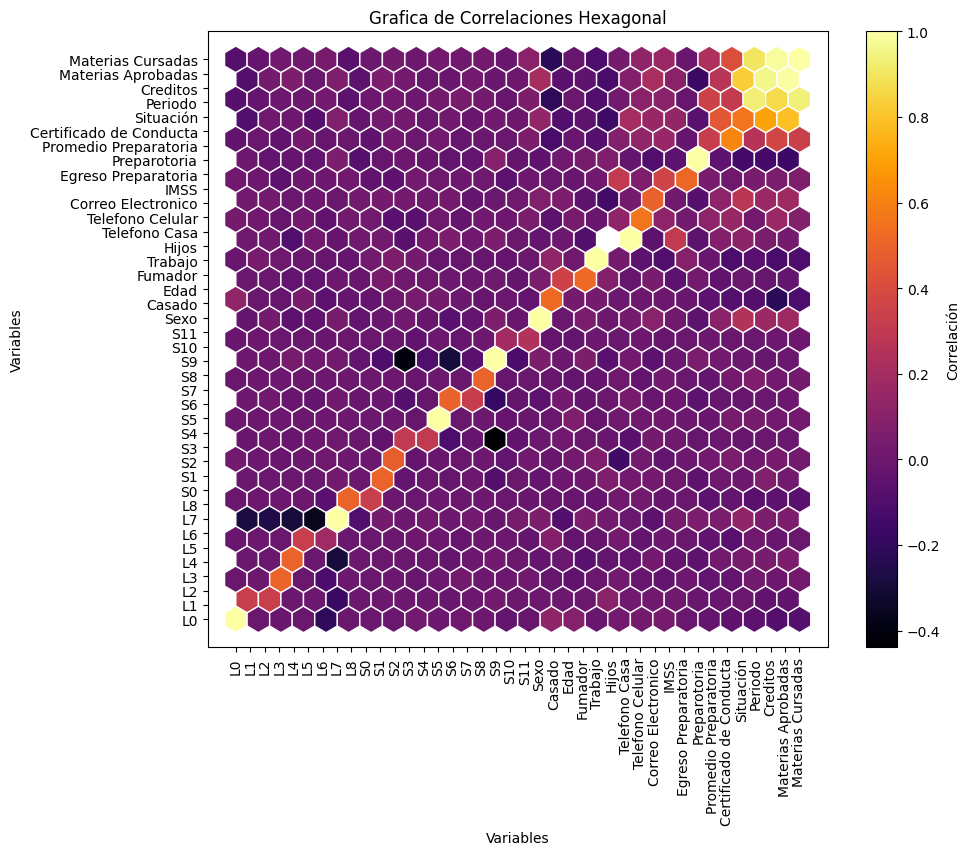

In [50]:

# Generar coordenadas x e y con las etiquetas de las variables
x, y = np.meshgrid(range(len(corr_mtx.columns)), range(len(corr_mtx.columns)))

# Aplana los valores de la matriz de correlación y elimina los valores de la diagonal
correlation_values = corr_mtx.values.flatten()

# Graficar los datos con gráfico hexbin
plt.figure(figsize=(10, 8))
plt.hexbin(x=x.flatten(), y=y.flatten(), C=correlation_values,edgecolor = "white", gridsize=25, cmap='inferno')

# Añadir barra de color
plt.colorbar(label='Correlación')

# Ajustar las etiquetas del eje x y eje y
plt.xticks(ticks=np.arange(len(corr_mtx.columns)), labels=corr_mtx.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_mtx.columns)), labels=corr_mtx.columns)

# Añadir título y etiquetas de los ejes
plt.title('Grafica de Correlaciones Hexagonal')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar la gráfica
plt.show()

In [51]:
columna_corr = ['Promedio Preparatoria','Creditos','Periodo','Materias Aprobadas','Materias Cursadas', 'Situación']
df_end = df_select[columna_corr]

In [52]:
# df Final
df_end.head()

,Promedio Preparatoria,Creditos,Periodo,Materias Aprobadas,Materias Cursadas,Situación
0,-1.261012,-2.052499,-2.285651,-2.089378,-2.303701,-1.463251
1,1.148086,0.585140,1.321959,0.384154,0.347147,0.683410
2,1.148086,0.585140,1.044451,0.384154,0.347147,0.683410
3,1.148086,0.585140,0.211925,0.384154,0.347147,0.683410
4,-0.056463,0.585140,1.044451,0.384154,0.347147,0.683410


In [202]:
df_end.shape

(512, 6)

In [205]:
df_end.describe()

,Promedio Preparatoria,Creditos,Periodo,Materias Aprobadas,Materias Cursadas,Situación
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,2.081668e-17,-5.551115e-17,-2.428613e-17,1.561251e-17,-2.428613e-17,-1.387779e-17
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.261012e+00,-2.345571e+00,-2.563159e+00,-2.460408e+00,-2.701329e+00,-1.463251e+00
25%,-1.261012e+00,-3.764991e-01,2.119254e-01,-2.033095e-01,1.041528e-01,-1.463251e+00
50%,-5.646324e-02,5.851405e-01,2.119254e-01,3.841544e-01,3.471473e-01,6.834096e-01
75%,1.148086e+00,5.851405e-01,4.894339e-01,5.490565e-01,5.238705e-01,6.834096e-01
max,1.148086e+00,5.851405e-01,1.876976e+00,7.551842e-01,7.447746e-01,6.834096e-01


In [206]:
df_end.to_csv('DataSet Final.csv', index=False)

### Segundo Metodo

In [94]:
df_select = df_transform

In [95]:
X_df = df_select.drop(columns=['Situación'])
y_df = df_select['Situación']
X_df.astype(float)
X = X_df.iloc[::].values
y = y_df.iloc[:].values

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X_df)

In [81]:
X

array([[-0.12835289, -0.04029115, -0.05702659, ..., -1.77221514,
        -1.81573212, -2.0173607 ],
       [-0.12835289, -0.04029115, -0.05702659, ...,  0.70465758,
         0.50366345,  0.46370947],
       [-0.12835289, -0.04029115, -0.05702659, ...,  0.70465758,
         0.50366345,  0.46370947],
       ...,
       [ 7.79102047, -0.04029115, -0.05702659, ...,  0.26432465,
         0.46500686,  0.54641181],
       [-0.12835289, -0.04029115, -0.05702659, ...,  0.4294495 ,
         0.61963323,  0.62911415],
       [-0.12835289, -0.04029115, -0.05702659, ..., -1.10483555,
        -1.04260026, -1.02493263]])

In [97]:
import statsmodels.api as sm
X = np.append(arr=np.ones((617,1)).astype(int), values=X, axis=1)

In [98]:
# Aplicando algoritmo de regresión hacía atrás

# Inicializando las variables optimas forzando columnas
X = X.astype(float)
X_opt = X[:].tolist()



In [99]:
# Inicializando el nivel de significación
sl = 0.05

regression_OLS = sm.OLS(y,X_opt).fit()

In [100]:
# Siguiendo reglas de eliminación hacía atrás
vali = False
while not vali:
    # Obtenemos el valor y el indice del valor más grande de los P-valores del modelo
    p_values_max_index = np.argmax(regression_OLS.pvalues)
    p_values_max_value = max(regression_OLS.pvalues)
    # Si el P-valor más grande es serior al nivel de significación eliminamos toda la columna y volvemos a ajustar el modelo
    if p_values_max_value > sl:
        X_opt = np.delete(X_opt, p_values_max_index, axis=1)
        regression_OLS = sm.OLS(y,X_opt).fit()
    # Si llega un punto en que los P-valores son infreiores al nivel de significación entonces damos por terminado el ajuste del modelo
    else:
        vali = True

In [101]:
# Mostramos Resultados Finales
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     100.2
Date:                Sun, 26 May 2024   Prob (F-statistic):          2.08e-121
Time:                        12:53:20   Log-Likelihood:                -653.93
No. Observations:                 617   AIC:                             1330.
Df Residuals:                     606   BIC:                             1379.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2658      0.028    150.379      0.000       4.210       4.322
x1            -0.0824      0.029     -2.820      0.005      -0.140      -0.025
x2            -0.1139      0.030     -3.836      0.000      -0.172      -0.056
x3             0.0735      0.030      2.472      0.014       0.015       0.132
x4             0.1390      0.029      4.793      0.000       0.082       0.196
x5             0.0764      0.029      2.629      0.009       0.019       0.134
x6             0.3523      0.044      8.075      0.000       0.267       0.438
x7            -0.8763      0.069    -12.672      0.000      -1.012      -0.740
x8             2.3273      0.236      9.870      0.000       1.864       2.790
x9            -2.1028      0.422     -4.987      0.000      -2.931      -1.275
x10            0.6580      0.315      2.092      0.037       0.040       1.276
==============================================================================
Omnibus:                       71.854   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.297
Skew:                          -0.806   Prob(JB):                     8.28e-24
Kurtosis:                       4.239   Cond. No.                         39.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
for x in range(len(X_opt[0])):
    print(X_opt[x][0])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [117]:
X_opt.shape

(617, 11)

In [133]:
# Convirtiendolo a una database
data = {
    'X0':[],
    'X1':[],
    'X2':[],
    'X3':[],
    'X4':[],
    'X5':[],
    'X6':[],
    'X7':[],
    'X8':[],
    'X9':[],
    'X10':[]
}

In [134]:

lista = []
for y in range(X_opt.shape[0]-1):
    for x in range(X_opt.shape[1]-1):
       
        value = X_opt[y][x]
        data['X0'].append(value)
        data['X1'].append(value)
        data['X2'].append(value)
        data['X3'].append(value)
        data['X4'].append(value)
        data['X5'].append(value)
        data['X6'].append(value)
        data['X7'].append(value)
        data['X8'].append(value)
        data['X9'].append(value)
        data['X10'].append(value)

  
 

In [135]:
df_end = pd.DataFrame(data)

In [136]:
df_end.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-0.157851,-0.157851,-0.157851,-0.157851,-0.157851,-0.157851,-0.157851,-0.157851,-0.157851,-0.157851,-0.157851
2,-0.354841,-0.354841,-0.354841,-0.354841,-0.354841,-0.354841,-0.354841,-0.354841,-0.354841,-0.354841,-0.354841
3,0.300177,0.300177,0.300177,0.300177,0.300177,0.300177,0.300177,0.300177,0.300177,0.300177,0.300177
4,0.331228,0.331228,0.331228,0.331228,0.331228,0.331228,0.331228,0.331228,0.331228,0.331228,0.331228


## Correcciones finales

In [21]:
df_solve = pd.read_csv('DataSet Final.csv')

In [53]:
df_solve = df_end

In [54]:
df_solve.shape

(512, 40)

In [55]:
# Tranformando Columna de "Situación"
for x in range(len(df_solve['Situación'])):
    colm = int(df_solve.iloc[x]['Situación'])
    #colm = int(df_transform['Situación'][x])
    if colm < 0:
        df_solve['Situación'][x] = 0
    else:
        df_solve['Situación'][x] = 1

C:\Users\gaels\AppData\Local\Temp\ipykernel_13428\812570315.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_solve['Situación'][x] = 0
C:\Users\gaels\AppData\Local\Temp\ipykernel_13428\812570315.py:8: FutureWarning: ChainedAssignmentEr

In [56]:
df_solve.head()

,L0,L1,L2,L3,L4,L5,L6,L7,L8,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,Sexo,Casado,Edad,Fumador,Trabajo,Hijos,Telefono Casa,Telefono Celular,Correo Electronico,IMSS,Egreso Preparatoria,Preparotoria,Promedio Preparatoria,Certificado de Conducta,Situación,Periodo,Creditos,Materias Aprobadas,Materias Cursadas
0,-0.125988,-0.044237,-0.062622,-0.099307,-0.088736,-0.088736,-0.133763,0.306622,-0.062622,-0.062622,-0.099307,-0.062622,1.456692,-0.125988,-0.044237,-0.266702,-0.076772,-0.044237,-1.081430,-0.173727,-0.044237,-0.595397,-0.221766,-0.584011,-0.748983,2.273472,0.0,0.196315,0.258199,0.279096,0.321634,-0.030899,1.310664,-1.261012,-0.324401,0.0,-2.285651,-2.052499,-2.089378,-2.303701
1,-0.125988,-0.044237,-0.062622,-0.099307,-0.088736,-0.088736,-0.133763,0.306622,-0.062622,-0.062622,-0.099307,-0.062622,1.456692,-0.125988,-0.044237,-0.266702,-0.076772,-0.044237,-1.081430,-0.173727,-0.044237,1.679552,-0.221766,1.392616,1.335144,2.273472,0.0,0.196315,0.258199,0.279096,0.321634,-0.030899,1.310664,1.148086,0.887960,1.0,1.321959,0.585140,0.384154,0.347147
2,-0.125988,-0.044237,-0.062622,-0.099307,-0.088736,-0.088736,-0.133763,0.306622,-0.062622,-0.062622,-0.099307,-0.062622,-0.686487,-0.125988,-0.044237,-0.266702,-0.076772,-0.044237,0.924701,-0.173727,-0.044237,-0.595397,-0.221766,-0.584011,1.335144,-0.439856,0.0,0.196315,0.258199,0.279096,0.321634,0.080510,1.953442,1.148086,0.887960,1.0,1.044451,0.585140,0.384154,0.347147
3,-0.125988,-0.044237,-0.062622,-0.099307,-0.088736,-0.088736,-0.133763,0.306622,-0.062622,-0.062622,-0.099307,-0.062622,-0.686487,-0.125988,-0.044237,-0.266702,-0.076772,-0.044237,0.924701,-0.173727,-0.044237,1.679552,4.509250,-0.584011,-0.748983,-0.439856,0.0,0.196315,0.258199,0.279096,0.321634,-0.030899,0.025109,1.148086,-0.324401,1.0,0.211925,0.585140,0.384154,0.347147
4,-0.125988,-0.044237,-0.062622,-0.099307,-0.088736,-0.088736,-0.133763,0.306622,-0.062622,-0.062622,-0.099307,-0.062622,1.456692,-0.125988,-0.044237,-0.266702,-0.076772,-0.044237,-1.081430,-0.173727,-0.044237,-0.595397,-0.221766,-0.584011,1.335144,-0.439856,0.0,0.196315,0.258199,-3.582993,0.321634,-0.030899,0.025109,-0.056463,-0.324401,1.0,1.044451,0.585140,0.384154,0.347147


In [19]:
df_solve.to_csv('DataSet Final.csv', index=False)